## Analyses Valeures Foncières
Nous allons effectuer des analyses des valeures foncières par département.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Liste des chemins vers vos fichiers CSV (par exemple : 'departement_01.csv', 'departement_02.csv', ...)
fichiers = [
    ("Val_fonciere/06_NICE.csv", "Nice"), 
    ("Val_fonciere/13_MARSEILLE.csv", "Marseille"), 
    ("Val_fonciere/31_TOULOUSE.csv", "Toulouse"), 
    ("Val_fonciere/33_BORDEAUX.csv", "Bordeaux"), 
    ("Val_fonciere/59_LILLE.csv", "Lille"), 
    ("Val_fonciere/69_LYON.csv", "Lyon"), 
    ("Val_fonciere/75_PARIS.csv", "Paris"),
    ("Val_fonciere/06_2023.csv", "Nice"),
    ("Val_fonciere/13_2023.csv", "Marseille"),
    ("Val_fonciere/31_2023.csv", "Toulouse"),
    ("Val_fonciere/33_2023.csv", "Bordeaux"),
    ("Val_fonciere/59_2023.csv", "Lille"),
    ("Val_fonciere/69_2023.csv", "Lyon"),
    ("Val_fonciere/75_2023.csv", "Paris")
    ]

# Lire chaque fichier CSV et les stocker dans une liste de DataFrames
dataframes = []
for fichier, departement in fichiers:
    df = pd.read_csv(fichier)
    df['departement'] = departement  # Ajouter la colonne avec le numéro du département
    dataframes.append(df)
    
# Combiner tous les DataFrames en un seul
df_combine = pd.concat(dataframes, ignore_index=True)

# Sauvegarder le DataFrame combiné dans un fichier CSV unique
df_combine.to_csv("Val_fonciere/data_combinee.csv", index=False)

print("Les fichiers CSV ont été combinés avec succès dans 'data_combinee.csv'")


C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (18,20,22) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (14,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\3466507985.py:26: DtypeWarning:

Columns (18) have mixed types. Spec

Les fichiers CSV ont été combinés avec succès dans 'data_combinee.csv'


In [17]:
df_full = pd.read_csv('Val_fonciere/data_combinee.csv')

print(df_full.head())

C:\Users\Hp envy\AppData\Local\Temp\ipykernel_4400\619756932.py:1: DtypeWarning:

Columns (8,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.



  id_mutation date_mutation  numero_disposition nature_mutation  \
0  2019-24051    2019-07-01                   1           Vente   
1  2019-24052    2019-07-01                   1           Vente   
2  2019-24053    2019-07-02                   1           Vente   
3  2019-24054    2019-07-04                   1           Vente   
4  2019-24054    2019-07-04                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe        adresse_nom_voie  \
0         170000.0            34.0             NaN             RUE ROSSINI   
1         215000.0            11.0               B           RUE MEYERBEER   
2         295000.0           106.0             NaN      AV DU PARC ATHENEE   
3         560000.0            10.0             NaN  RUE DU MARECHAL JOFFRE   
4         560000.0            10.0             NaN  RUE DU MARECHAL JOFFRE   

  adresse_code_voie  code_postal  ...  surface_reelle_bati  \
0              5600       6000.0  ...                 35.0   
1   

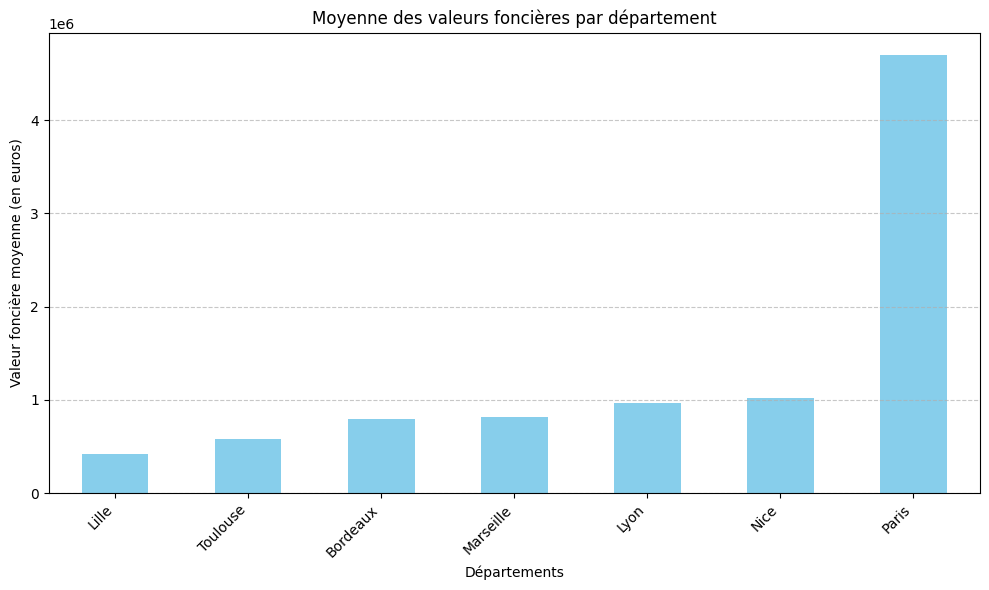

In [18]:
moyenne_par_departement = df_full.groupby('departement')['valeur_fonciere'].mean().sort_values()

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
moyenne_par_departement.plot(kind='bar', color='skyblue')
plt.title("Moyenne des valeurs foncières par département")
plt.xlabel("Départements")
plt.ylabel("Valeur foncière moyenne (en euros)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Évolution temporelle des valeurs foncières moyennes par département
Cet exemple permet de sélectionner un département via un menu déroulant pour afficher l’évolution des valeurs foncières moyennes.

In [3]:
# 'date_mutation' au format datetime
df_full['date_mutation'] = pd.to_datetime(df_full['date_mutation'])

# Calcul de la valeur foncière moyenne par mois et par département
df_full['year_month'] = df_full['date_mutation'].dt.to_period('M')
df_monthly_avg = df_full.groupby(['departement', 'year_month'])['valeur_fonciere'].mean().reset_index()
df_monthly_avg['year_month'] = df_monthly_avg['year_month'].dt.to_timestamp()

# Création d'un widget de sélection de département
departement_dropdown = widgets.Dropdown(
    options=df_monthly_avg['departement'].unique(),
    description='Département:',
    value=df_monthly_avg['departement'].unique()[0]
)

def update_graph(departement):
    # Filtrer les données pour le département sélectionné
    dept_data = df_monthly_avg[df_monthly_avg['departement'] == departement]
    # Tracer le graphique pour le département sélectionné
    plt.figure(figsize=(12, 6))
    plt.plot(dept_data['year_month'], dept_data['valeur_fonciere'], marker='o', linestyle='-')
    plt.title(f"Évolution des valeurs foncières moyennes pour le département {departement}")
    plt.xlabel("Date")
    plt.ylabel("Valeur foncière moyenne (en euros)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    
# Affichage interactif avec ipywidgets
widgets.interactive(update_graph, departement=departement_dropdown)

interactive(children=(Dropdown(description='Département:', options=('Bordeaux', 'Lille', 'Lyon', 'Marseille', …

Ces graphiques montrent des différences significatives entre les marchés immobiliers de chaque ville :
- Paris se démarque par ses valeurs élevées et des fluctuations importantes, ce qui est typique pour un marché immobilier prestigieux.
- Les autres villes, comme Nice, Marseille, Lyon, et Bordeaux, montrent des tendances de stabilisation ou des hausses récentes, soulignant leur attractivité croissante.
- Lille et Toulouse semblent avoir des marchés plus volatils, avec des pics occasionnels qui pourraient être influencés par des transactions spécifiques de biens de plus grande valeur.

Ces analyses mettent en évidence des différences dans la dynamique immobilière selon les départements, soulignant le caractère unique de chaque marché en fonction de facteurs locaux tels que la demande, l’attractivité de la région, et les types de biens échangés.L’évolution des valeurs foncières moyennes par département au fil du temps montre des tendances différentes en fonction des régions. Certains départements peuvent afficher une augmentation régulière des valeurs foncières, indiquant une demande croissante ou une spéculation immobilière dans ces zones. D’autres départements peuvent connaître des fluctuations ou une baisse, potentiellement en raison de facteurs économiques locaux, de l’offre excédentaire de biens, ou de la migration démographique. Cette analyse permet d'identifier des départements où le marché immobilier est en expansion ou en déclin, fournissant des indications pour des décisions d’investissement ciblées.

### Distribution des valeurs foncières par type de bien dans un département
Cet exemple utilise un menu déroulant pour sélectionner un département et affiche la distribution des valeurs foncières par type de bien dans un graphique de boîte à moustaches.

In [ ]:
import seaborn as sns

# Création d'un widget de sélection de département
departement_dropdown = widgets.Dropdown(
    options=df_monthly_avg['departement'].unique(),
    description='Département:',
    value=df_monthly_avg['departement'].unique()[0]
)

# Fonction pour mettre à jour le graphique en fonction du département sélectionné
def update_boxplot(departement):
    # Filtrer les données pour le département sélectionné
    df_dept = df_combine[df_combine['departement'] == departement]
    # Tracer le graphique de boîte à moustaches pour la distribution des valeurs foncières par type de bien
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_dept, x='type_local', y='valeur_fonciere')
    plt.title(f"Distribution des valeurs foncières par type de bien pour le département {departement}")
    plt.xlabel("Type de bien")
    plt.ylabel("Valeur foncière (en euros)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    
widgets.interactive(update_boxplot, departement=departement_dropdown)

interactive(children=(Dropdown(description='Département:', options=('Bordeaux', 'Lille', 'Lyon', 'Marseille', …

Cette analyse permet de conclure que les types de biens ont un impact significatif sur les valeurs foncières moyennes dans chaque département, avec des écarts marqués entre les appartements, les maisons, les locaux commerciaux et les dépendances. Les boîtes à moustaches permettent également de repérer les biens de haute valeur au sein de chaque catégorie, souvent dans des villes plus grandes ou économiquement dynamiques comme Paris et Bordeaux. Cela fournit des insights précieux pour les investisseurs et les acheteurs qui souhaitent identifier les types de biens avec le meilleur potentiel de valorisation selon le département.La distribution des valeurs foncières par type de bien révèle une variation importante des prix en fonction du type de bien (par exemple, maisons, appartements, locaux commerciaux). Les maisons et les appartements peuvent afficher des médianes de prix très différentes, avec des écarts significatifs entre les valeurs minimales et maximales, indiquant une diversité dans l’offre et la demande pour chaque type de bien. Cette analyse permet de mieux comprendre la structure des prix dans le département et d’identifier les segments de marché (type de bien) les plus onéreux ou abordables. Les boîtes à moustaches aident aussi à repérer les biens de luxe ou haut de gamme par leurs valeurs foncières extrêmes.

### Carte des transactions pour visualiser les zones de forte activité immobilière
Cet exemple utilise un slider pour sélectionner une plage de valeurs foncières et afficher les transactions dans une carte de dispersion des coordonnées.

In [5]:
# Création d'un slider pour sélectionner la plage de valeurs foncières
valeur_slider = widgets.FloatRangeSlider(
    value=[100000, 500000],
    min=100000,
    max=1000000,
    step=10000,
    description='Valeur foncière:',
    continuous_update=False
)

# Fonction pour mettre à jour la carte en fonction de la plage de valeurs foncières
def update_map(valeur_fonciere):
    # Filtrer les données en fonction de la plage de valeurs foncières
    filtered_df = df_combine[(df_combine['valeur_fonciere'] >= valeur_fonciere[0]) & 
                             (df_combine['valeur_fonciere'] <= valeur_fonciere[1])]
    
    # Tracer la carte des transactions
    plt.figure(figsize=(10, 8))
    plt.scatter(filtered_df['longitude'], filtered_df['latitude'], 
                c=filtered_df['valeur_fonciere'], cmap='viridis', s=10, alpha=0.5)
    plt.colorbar(label='Valeur foncière')
    plt.title(f"Carte des transactions foncières (valeurs entre {valeur_fonciere[0]:,.0f} et {valeur_fonciere[1]:,.0f} euros)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid()
    plt.show()

# Affichage interactif avec le slider
widgets.interactive(update_map, valeur_fonciere=valeur_slider)

interactive(children=(FloatRangeSlider(value=(100000.0, 500000.0), continuous_update=False, description='Valeu…

Cette carte interactive permet d’identifier visuellement les zones de forte activité immobilière et de comprendre comment les transactions immobilières se distribuent en fonction des valeurs foncières. Elle révèle des tendances géographiques liées à la demande et à l’offre immobilière :
- Zones de haute valeur : Concentrées autour des centres économiques et des quartiers résidentiels de prestige.
- Zones à valeurs plus accessibles : Plus dispersées, offrant des opportunités pour des biens plus abordables dans des zones périurbaines.

Cette visualisation fournit des insights utiles pour les investisseurs ou les acteurs du marché immobilier, en leur permettant de cibler leurs recherches en fonction des prix et de l'attractivité géographique.La carte des transactions foncières permet de visualiser les zones géographiques avec une forte concentration d’activités immobilières. Les points de forte densité représentent généralement les centres urbains ou les zones en développement où la demande est élevée. Les transactions avec des valeurs foncières élevées sont souvent situées dans des quartiers prisés ou des zones commerciales, tandis que les valeurs plus basses peuvent correspondre à des zones périphériques ou rurales. Cette carte fournit un aperçu des "hot spots" immobiliers et aide à identifier les régions où les prix sont les plus élevés, permettant aux investisseurs et acheteurs de mieux orienter leurs recherches.

### Relation entre la surface bâtie et la valeur foncière
Cet exemple utilise deux sliders pour définir des plages de surface bâtie et de valeur foncière, et montre la relation entre les deux.

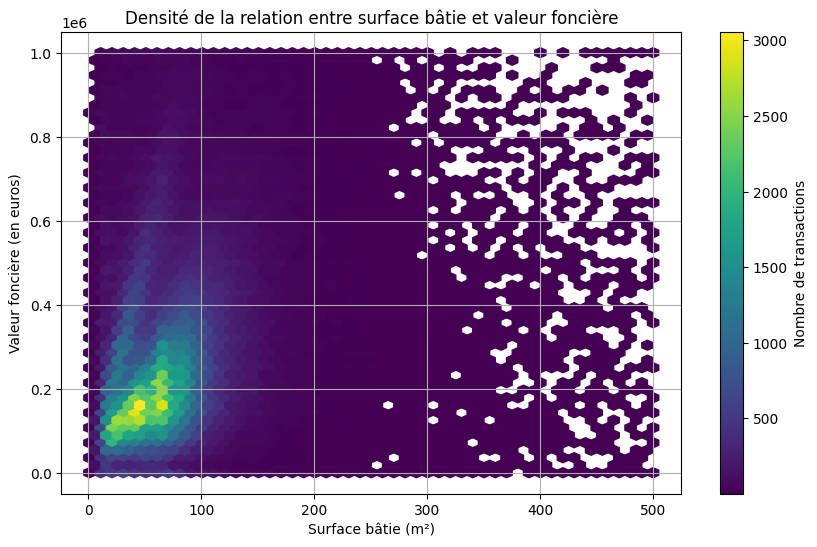

In [21]:
# Filtrer les données pour ne garder que celles avec une surface bâtie et une valeur foncière
filtered_df = df_combine.dropna(subset=['surface_reelle_bati', 'valeur_fonciere'])
# Filtrer les données pour une plage de surface et de valeur foncière raisonnables
filtered_df_limited = filtered_df[(filtered_df['surface_reelle_bati'] <= 500) & (filtered_df['valeur_fonciere'] <= 1000000)]


# Tracer le graphique de dispersion
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df_limited['surface_reelle_bati'], filtered_df_limited['valeur_fonciere'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Nombre de transactions')
plt.title("Densité de la relation entre surface bâtie et valeur foncière")
plt.xlabel("Surface bâtie (m²)")
plt.ylabel("Valeur foncière (en euros)")
plt.grid()
plt.show()

Ce graphique met en évidence une relation claire entre la taille des biens et leur valeur, avec une concentration de la demande pour les petites surfaces à prix modéré, caractéristique du marché résidentiel de milieu de gamme. Les biens de plus grande surface ou de plus grande valeur sont plus rares, ce qui reflète leur exclusivité. Cette visualisation permet de comprendre le segment de marché le plus actif et peut orienter les stratégies d’investissement en fonction de la demande majoritaire.

# Conclusion

À partir de l'analyse approfondie des transactions foncières dans plusieurs départements français, différentes observations ont été faites concernant les tendances des valeurs foncières, la demande immobilière, et les segments de marché. Ces observations permettent de dégager des recommandations sur les départements les plus intéressants pour des stratégies d’investissement en fonction des objectifs et profils d'investisseurs.

## Synthèse des Observations par Département :

Paris :
Caractéristiques : Paris se distingue par des valeurs foncières extrêmement élevées, particulièrement pour les appartements et les locaux commerciaux. Le marché immobilier parisien est dominé par des biens de prestige et une demande intense, notamment dans les quartiers centraux et prisés.
Opportunités d’Investissement : Investir à Paris convient particulièrement aux investisseurs cherchant à se positionner sur le segment de l’immobilier haut de gamme, avec un potentiel de valorisation important mais à un coût initial élevé. Cependant, la rentabilité locative peut être faible par rapport aux montants investis, en raison des prix déjà très élevés.
Risques : Forte volatilité des prix et une concurrence intense. Ce marché nécessite un capital conséquent et une stratégie de long terme.

Bordeaux :
Caractéristiques : Bordeaux montre une attractivité croissante avec des valeurs foncières en hausse, notamment pour les locaux commerciaux. La demande est soutenue, et la ville attire aussi bien des investisseurs résidentiels que commerciaux.
Opportunités d’Investissement : Un choix intéressant pour les investisseurs cherchant un compromis entre prestige et rentabilité. Bordeaux est en plein essor, avec des perspectives de valorisation. Le marché résidentiel est dynamique, et les locaux commerciaux dans les zones d’affaires sont également en forte demande.
Risques : La hausse continue des prix pourrait éventuellement ralentir le marché. Cependant, Bordeaux reste une option solide pour ceux qui cherchent à investir dans une ville en croissance.

Lyon :
Caractéristiques : Lyon présente une stabilité relative avec des valeurs foncières modérées et un marché bien équilibré entre les segments résidentiels et commerciaux. Des hausses récentes indiquent une attractivité croissante.
Opportunités d’Investissement : Un marché attractif pour les investisseurs qui recherchent à la fois la stabilité et une bonne rentabilité locative. Les prix y sont plus abordables qu’à Paris, mais avec un potentiel de croissance dans les quartiers en développement.
Risques : Peu de risques de volatilité extrême. Lyon représente un marché mature avec une demande soutenue et des perspectives de valorisation à moyen terme.

Nice et Marseille :
Caractéristiques : Ces villes du sud affichent des valeurs foncières relativement élevées, en particulier pour les biens résidentiels. Le marché est dynamique, mais il tend vers une stabilisation après des hausses significatives.
Opportunités d’Investissement : Ces villes sont attractives pour l’investissement locatif résidentiel, avec une forte demande dans des zones prisées près de la mer. Les biens de taille moyenne ou petite sont les plus prisés.
Risques : La saisonnalité et la dépendance au tourisme peuvent affecter les rendements locatifs. De plus, le marché est sujet à des fluctuations dans certains quartiers moins stables économiquement.

Toulouse et Lille :
Caractéristiques : Ces villes présentent des valeurs foncières plus modestes, avec des opportunités sur le marché résidentiel de milieu de gamme. Toulouse montre une certaine volatilité, tandis que Lille reste globalement stable.
Opportunités d’Investissement : Ces villes sont idéales pour les investisseurs recherchant des biens accessibles, avec de bons rendements locatifs. Leurs marchés résidentiels offrent un potentiel de rentabilité pour des investissements locatifs à prix abordables.
Risques : Une croissance plus modérée de la valeur foncière. Ces villes sont attractives pour des stratégies d’investissement à faible coût d’entrée, mais avec des perspectives de valorisation moins importantes.

## Recommandations d'Investissement

Investissement Haut de Gamme et Long Terme : Paris et Bordeaux
Profil Investisseur : Investisseurs disposant de capital conséquent, prêts à investir sur le long terme pour des biens de prestige.
Perspective : Le potentiel de valorisation est élevé, surtout à Paris, mais le coût d'entrée est élevé et le rendement locatif peut être relativement bas en raison des prix d'acquisition.

Investissement Croissance et Rentabilité Modérée : Lyon et Bordeaux
Profil Investisseur : Investisseurs recherchant un équilibre entre rentabilité locative et potentiel de valorisation.
Perspective : Ces villes offrent une stabilité et une demande croissante, surtout dans les quartiers en développement, avec des valeurs foncières encore raisonnables comparées à Paris.

Investissement Locatif Résidentiel Rentable : Nice, Marseille, Toulouse et Lille
Profil Investisseur : Investisseurs cherchant une rentabilité locative avec un budget modéré, notamment pour des biens résidentiels de taille moyenne.
Perspective : Ces villes présentent un marché accessible avec de bonnes perspectives de rendement locatif, bien qu'avec des hausses de valorisation plus modestes. Idéal pour les investisseurs individuels ou débutants.

## Conclusion Finale

En résumé, les villes les plus attractives pour un investissement immobilier dépendent des objectifs de chaque investisseur :

- Paris reste incontournable pour le prestige et le potentiel de valorisation à long terme.
- Bordeaux et Lyon offrent un excellent compromis pour des stratégies de croissance et de rentabilité locative.
- Nice, Marseille, Toulouse, et Lille conviennent aux investisseurs à la recherche de biens abordables avec de bons rendements locatifs dans des marchés régionaux solides.

Chacun de ces marchés présente des opportunités uniques en fonction du profil d'investissement et des objectifs à court ou long terme. Les choix finaux devraient s'appuyer sur l'analyse de la demande locale, des tendances de valorisation, et de la rentabilité locative pour maximiser le retour sur investissement.

In [10]:
df_loyers = pd.read_csv("Loyer\loyerm²par departement.csv")
df_loyers['Ville'] = df_loyers['LIBGEO'].str.split().str[0].str.capitalize()
moyenne_loyer_par_ville = df_loyers.groupby("Ville")["Loyer/m²"].mean()
print(moyenne_loyer_par_ville)

Ville
Bordeaux     14.735969
Lille        12.958618
Lyon         14.586648
Marseille    14.393013
Nice         17.402277
Paris        27.836413
Toulouse     12.410270
Name: Loyer/m², dtype: float64


In [19]:
score_par_departement = moyenne_par_departement / moyenne_loyer_par_ville

In [20]:
score_par_departement = score_par_departement.sort_values()

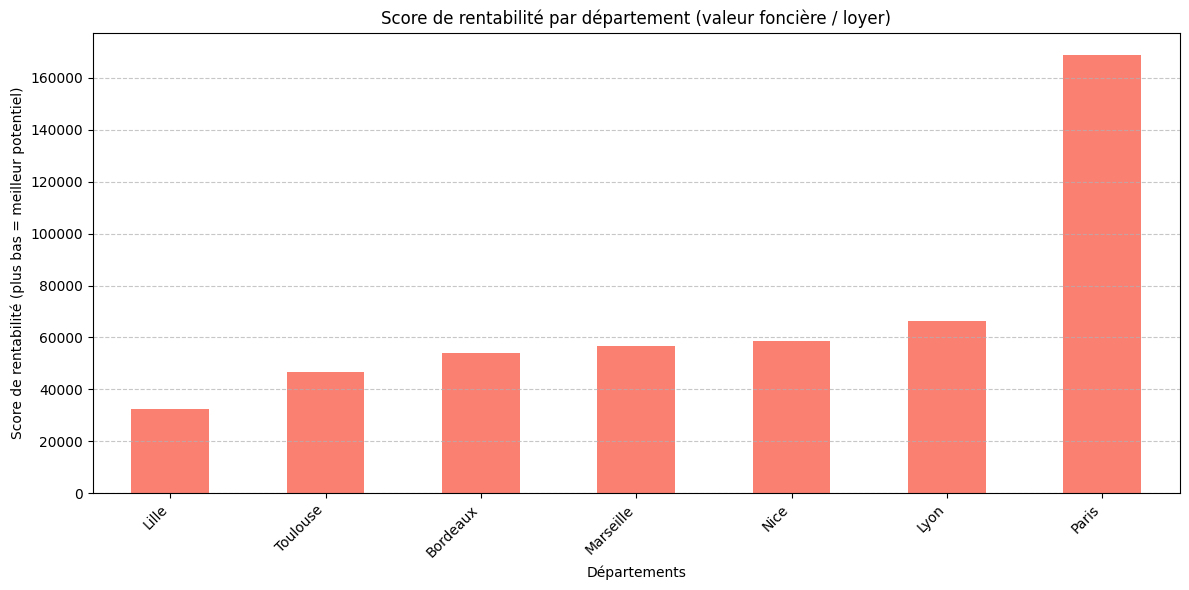

In [21]:
plt.figure(figsize=(12, 6))
score_par_departement.plot(kind='bar', color='salmon')
plt.title("Score de rentabilité par département (valeur foncière / loyer)")
plt.xlabel("Départements")
plt.ylabel("Score de rentabilité (plus bas = meilleur potentiel)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusion et Interprétation du Score pour un Investisseur

Le score calculé, représentant le ratio entre la **valeur foncière moyenne** et le **loyer moyen** par département, est un indicateur précieux pour évaluer le potentiel de rendement locatif et l’attractivité d’un investissement. Voici comment interpréter ce score :

1. **Score Faible** : Les départements avec un score faible indiquent que les revenus locatifs sont relativement élevés par rapport aux prix d’achat des biens. Cela suggère un **potentiel de rendement locatif plus élevé** et un retour sur investissement plus rapide. Pour les investisseurs centrés sur les revenus locatifs, ces départements sont probablement plus attractifs, car ils peuvent offrir un meilleur flux de trésorerie par rapport au coût initial du bien.

2. **Score Élevé** : Un score élevé signifie que les prix d’achat des biens sont élevés par rapport aux loyers moyens, ce qui indique un **rendement locatif plus faible**. Dans ces départements, le retour sur investissement provenant des revenus locatifs pourrait prendre plus de temps. Cependant, ces zones pourraient tout de même être intéressantes pour une **appréciation du capital** si elles sont prestigieuses ou connaissent une forte croissance des prix immobiliers.

### Stratégie d’Investissement Basée sur le Score

- **Pour les Investisseurs Orientés vers le Rendement Locatif** : Les départements avec des scores bas sont à privilégier, car ils offrent un bon équilibre entre le prix d’achat et les revenus locatifs. Cela peut conduire à un meilleur flux de trésorerie et à une rentabilité plus rapide via les loyers seuls.
  
- **Pour l’Appréciation du Capital** : Les départements avec des scores élevés peuvent indiquer des marchés avec des biens immobiliers de grande valeur, potentiellement en raison d’une forte demande ou d’une offre limitée. Bien que les rendements locatifs y soient plus faibles, les investisseurs peuvent bénéficier de gains en capital à long terme si les valeurs immobilières continuent de croître dans ces départements.

En résumé, ce score permet aux investisseurs d’adapter leur stratégie en fonction de leurs objectifs. Les départements avec un score faible sont plus intéressants pour les rendements locatifs immédiats, tandis que ceux avec un score élevé conviennent mieux à des stratégies de croissance à long terme axées sur l’appréciation du capital. Ce score aide ainsi les investisseurs à mieux aligner leurs choix avec leurs objectifs financiers et leur tolérance au risque.